<a href="https://colab.research.google.com/github/Juanpa06/Teoria-de-comunicacion-y-procesamiento-de-senales/blob/main/Lab_Proyecto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab/Proyecto 3
##Estudiantes:


*   Juan Pablo Jiménez Anderson 
*   Gabriel Blanco Mora         
*   Kevin Chinchilla Gómez     


##Importación de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import jv
from scipy.signal import butter, lfilter, freqz
from scipy.fft import fft, ifft, fft2, ifft2, fftfreq


##Tarea 1

### Modulación PM y FM


La modulación de ándulo se presenta cuando la fase de una señal portadora de onda continua es variada de forma proporcional a una señal de información (moduladora). Esto se puede lograr variando directamente la fase (modulación de fase PM) o variando directamente la frecuencia (modulación de frecuencia FM), cuyas representaciones matemáticas se presentan a continuación.

$$s_{PM}(t) = A_c\cdot cos(2 \pi f_c t + k_p m(t))$$

$$s_{FM}(t) = A_c\cdot cos(2 \pi f_c t + 2 \pi k_f \int_{0}^{t} m(\tau) \cdot d\tau)$$




#### Declaración de variables de muestreo
Como todas las señales se trabajan de manera discreta, tanto en el dominio del tiempo como en el de la frecuencia, se definen primeramente la frecuencia de muestreo, el intervalo de tiempo total y la cantidad de muestras de cada señal.

In [ ]:
fs=171888 #Frecuencia de muestreo
T=np.pi/54 #Tiempo total en el que se graficaran las se;ales
n=int(T*fs) #Numero de muestras totales


#### Función de modulación FM y PM
Se crea una función "modulación" que recibe las amplitudes deseadas para las señales moduladora y portadora, la frecuencia de la portadora, y las sensibilidades de fase ($k_p$) y de frecuencia ($k_f$). Dicha función se encarga de crear las señales moduladora, portadora, moduladora derivada y moduladora integrada; esto con el fin de, a partir de estas, crear las señales moduladas por fase (PM) y por frecuencia (FM). Finalmente, grafica los resultados.

In [ ]:
#Función moduladora, recibe como parámetro la frecuencia de la señal portadora 
def modulacion(frec_por, A_mod, A_por, kp, kf):
  x=np.linspace(0,T,n,endpoint=True)                                            #Muestras de tiempo
  y_mod=A_mod * np.sin(2*np.pi*120*x)                                           #Señal moduladora
  y_mod_derivada=A_mod * np.cos(2*np.pi*120*x)                                  #Señal moduladora derivada
  y_por=A_por * np.sin(2*np.pi*frec_por*x)                                              #Señal de la portadora, utiliza parametro de entrada de la función

  y_PM=A_por*(np.cos(2*np.pi*frec_por*x + kp* y_mod))                           #Señal modulada por fase (PM)

  y_FM=A_por*(np.cos(2*np.pi*frec_por*x+2*np.pi*kf*A_mod*(-np.cos(2*np.pi*120*x)))) #Señal modulada por frecuencia (FM)

  f = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
  f.set_figwidth(24)
  f.set_figheight(5)
  figure, axis = plt.subplots(8, 1,figsize=(24,15))
  axis[0].plot(x, y_mod)
  axis[0].set_title("Señal moduladora")
  axis[1].plot(x, y_mod_derivada)
  axis[1].set_title("Señal moduladora derivada")
  axis[2].plot(x, y_por)
  axis[2].set_title("Señal portadora")
  axis[3].plot(x, y_PM)
  axis[3].set_title("Señal modulada en PM")
  axis[4].plot(x, y_FM)
  axis[4].set_title("Señal modulada en FM")
                                        
  axis[5].plot(x, y_mod)                                                        #Se proceden a graficar señales juntas para facilitar el análisis de resultados
  axis[5].plot(x, y_mod_derivada)
  axis[5].set_title("Señal modulada (azul) y Señal modulada derivada (naranja)")

  axis[6].plot(x, y_por)
  axis[6].plot(x, y_PM)
  axis[6].set_title("Señal portadora (azul) y señal modulada PM (naranja)")

  axis[7].plot(x, y_por)
  axis[7].plot(x, y_FM)
  axis[7].set_title("Señal portadora (azul) y señal modulada FM(naranja)")

  plt.show()
  return(y_por,y_mod,frec_por)

#-------------AQUI SE LLAMA A LA FUNCION MODULACION Y SE DETERMINA LA FRECUENCIA DE LA PORTADORA, LAS AMPLITUDES DE LA MODULADORA Y PORTADORA, Y LOS FACTORES KP Y KF---------------
y_por,y_mod,frec_por=modulacion(360, 1, 1, 1, 0.2)

#### Análisis de resultados

Se puede observar de los resultados anteriores, que las últimas tres gráficas se realizaron para facilitar el análisis de los resultados. Donde en la gráfica de la señal portadora y la señal modulada PM, se puede observar cómo la señal modulada PM aumenta su frecuencia cuando la señal moduladora derivada es positiva. Por otro lado, se puede apreciar que en la gráfica de la señal portadora y la señal modulada FM, la frecuencia de la señal modulada FM aumenta cuando la señal modulada es positiva.

Cabe destacar que estos resultados varían significativamente si se cambian los valores de las sensibilidades de fase y frecuencia; cambiando en algunos casos la forma original de la señal.

##Tarea 2

###Función Fourier

Se define una función de manera que sea posible desplegar la transformada de Fourier simétrica con atributos de entrada:
*   signal: variable que contiene la señal
*   inflimit: límite inferior de la gráfica
*   suplimit: límite superior de la gráfica


In [ ]:
def fourier(signal, inflimit, suplimit):
  n = 10000                                                                     # 10000 muestras de -T a T
  T = np.pi/54
  t = np.linspace(-T,T,n)
  dt = np.diff(t)[0]
  #print(dt)

  f = fftfreq(len(t), dt)
  g = fft(signal)

 #Ploteo de la gráfica
  fig, ax = plt.subplots()
  ax.stem(f, np.abs(g))
  ax.set(ylim=(0, 1000), yticks=np.arange(0, 1000, 100))
  plt.xlim([inflimit, suplimit])
  plt.xlabel('$f_n$ [$s^{-1}$]', fontsize=20)
  plt.ylabel('|$\hat{Y}$|', fontsize=20)
  plt.show()

###Función generadora de señal

Se crea una función generadora de señales con atributos de entrada:


*   freq: frecuencia de la señal en Hz
*   amp: amplitud de la señal



In [ ]:
def generator(freq, amp):
  T = np.pi/54
  x = np.linspace(-T,T,10000,endpoint=True)                                     # Señal va de -T a T en x con un muestreo de 10000                        
  y_cos = amp * np.cos(2*np.pi*freq*x)                                          # Señal
  y_sin = amp * np.sin(2*np.pi*freq*x)                                          # Señal con 90 deg de retraso


  #Ploteo de la gráfica
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y_cos)
  plt.plot(x,y_sin)
  plt.show()
  return(x, y_cos, y_sin)


###Función NBFM

Función que modula la señal en Narrow Body FM, tiene como atributos de entrada:


*   carrier_cos: función portadora generada con un coseno
*   carrier_sin: función portadora desfasada 90 grados respecto al seno
*   message_sin: función moduladora integrada (viene de un coseno) 



In [ ]:
def NBFM(carrier_cos, carrier_sin, message_sin, beta):
  T = np.pi/54
  x = np.linspace(-T,T,10000,endpoint=True)  
  y = carrier_cos - beta*carrier_sin*message_sin                                # acá se realiza la modulación

  # Plot
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y)
  plt.show()
  return (y)


###Función NBPM

Función que modula la señal en Narrow Body PM, tiene como atributos de entrada:


*   carrier_cos: función portadora generada con un coseno
*   carrier_sin: función portadora desfasada 90 grados respecto al seno
*   message_sin: función moduladora original (viene de un coseno) 

In [ ]:
def NBPM(carrier_cos, carrier_sin, message_cos, beta):
  T = np.pi/54
  x = np.linspace(-T,T,10000,endpoint=True)  
  y = carrier_cos - beta*carrier_sin*message_cos                                # acá se realiza la modulación

  # Plot
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,y)
  plt.show()
  return (y)

###Función plotting

Esta función recibe como atributos 2 señales, A y B de forma que se puedan mostrar ambas señales para así compararlas, la señal A aparecerá en azul y la B en anaranjado



In [ ]:
def plotting(A,B):
  x = np.linspace(-T,T,10000,endpoint=True) 
  f = plt.figure()
  f.set_figwidth(24)
  f.set_figheight(5)
  plt.plot(x,A)
  plt.plot(x,B)
  plt.xlim([0, 0.009])
  plt.show()

###Modulador NBFM

Primeramente se genera la función moduladora, tamto su versión no integrada (azul), como su versión integrada (anaranjada) la cual coincidentemente es un desfase de 90 grados, por ende un seno.

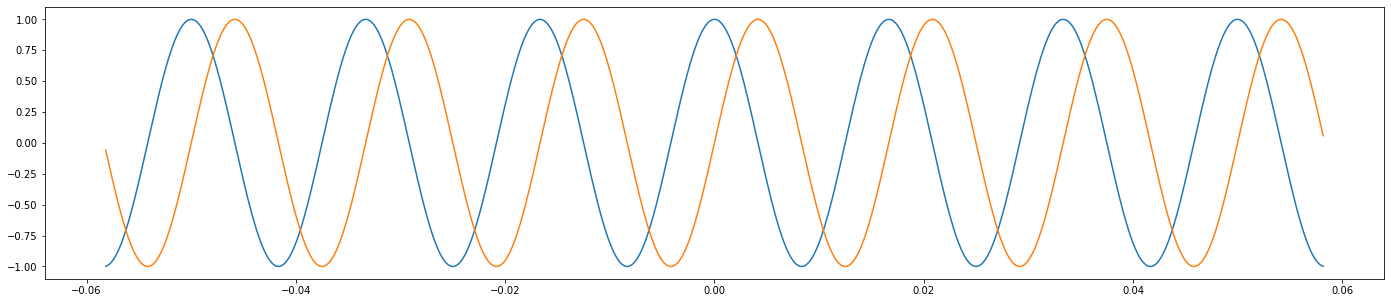

In [ ]:
x, y_cos, y_sin = generator(60, 1)

De igual forma se genera la señal portadora en azul, y su homóloga desfasada por 90 grados en anaranjado

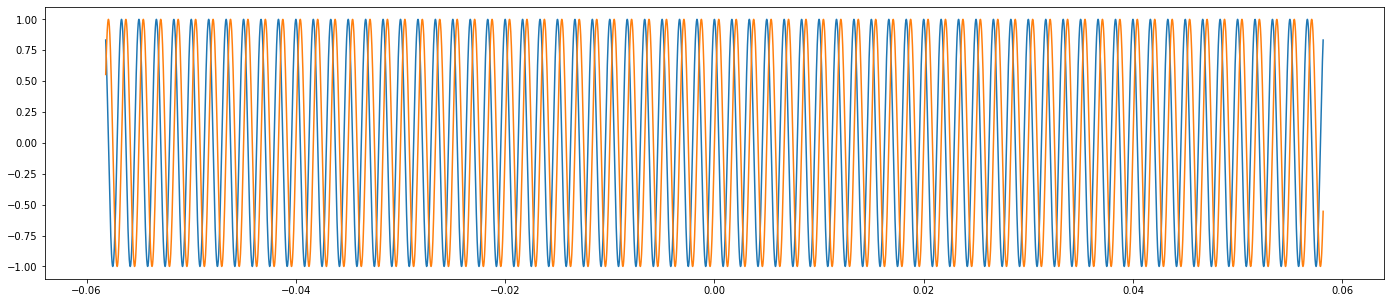

In [ ]:
x_carrier, y_cos_carrier, y_sin_carrier = generator(600, 1)

Por último se muestra la señal ya modulada, es un poco dificil observar los cambios en la frecuencia de la señal, sin embargo, si se amplia la imaagen y se compara con la señal portadora es más sencillo observar la diferencia.

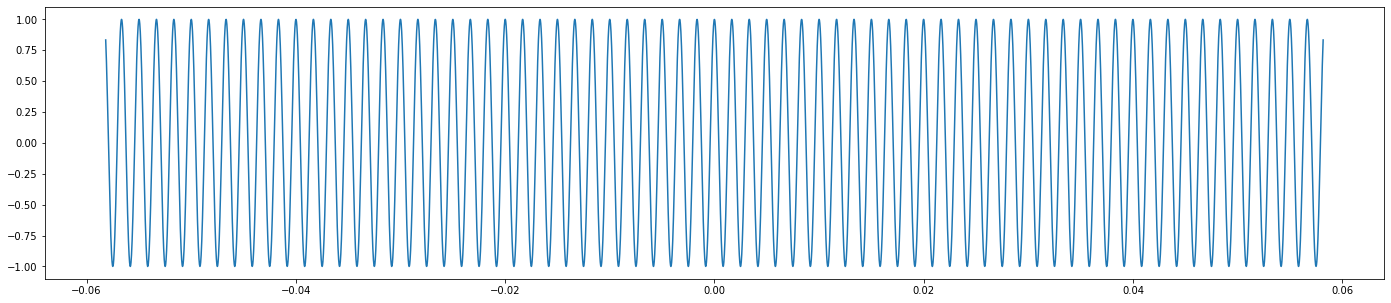

In [ ]:
s_t = NBFM(y_cos_carrier, y_sin_carrier, y_sin, 0.030)

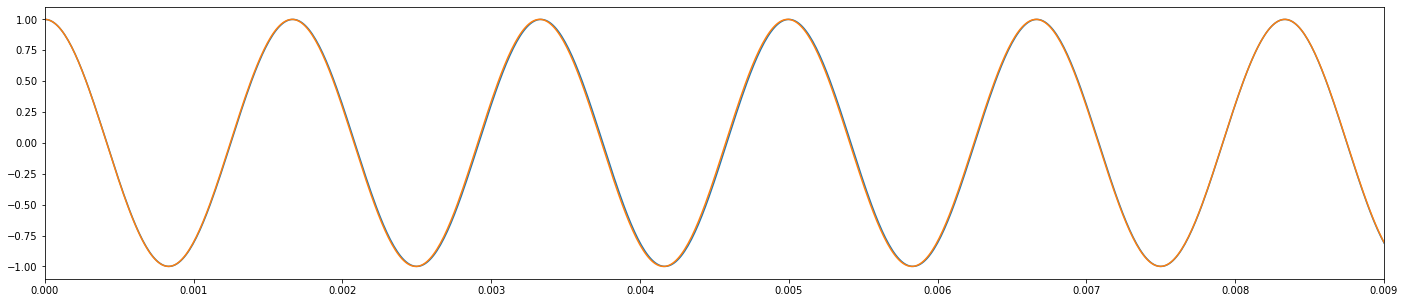

In [ ]:
plotting(y_cos_carrier, s_t)

En la gráfica anterior puede apreciarse una versión ampliada de la señal, en donde sí es visible la variación en la frecuencia de la señal s_t (anaranjada) en comparación a la señal portadora, la cual tiene una frecuencia fija de 600 Hz. Dicha variación representa la modulación de la señal moduladora en la señal portadora

Por su parte, en la frecuencia se tiene el siguiente comportamiento, el cual es congruente con la respueste en frecuencia esperado, quzá se obsrva de mejor manera en la gráfica ampliada adjunta



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


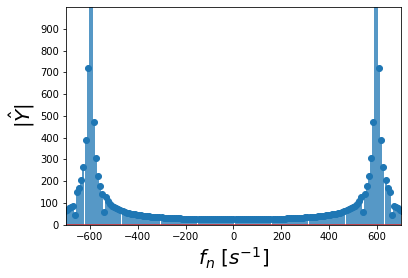

In [ ]:
fourier(s_t, -700, 700)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


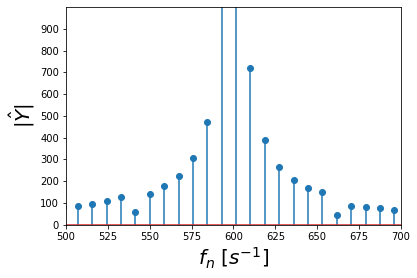

In [ ]:
fourier(s_t, 500, 700)

En este caso, se tiene un pico en la frecuencia de la señal portadora sin embargo hay 2 pequeños picos en la frecuencia $f_c \pm f_m$, lo que es un comportamiento esperado según la teoría.

###Modulador NBPM

Primeramente se genera la función moduladora, tamto su versión no integrada (azul), como su versión integrada (anaranjada) la cual coincidentemente es un desfase de 90 grados, por ende un seno.

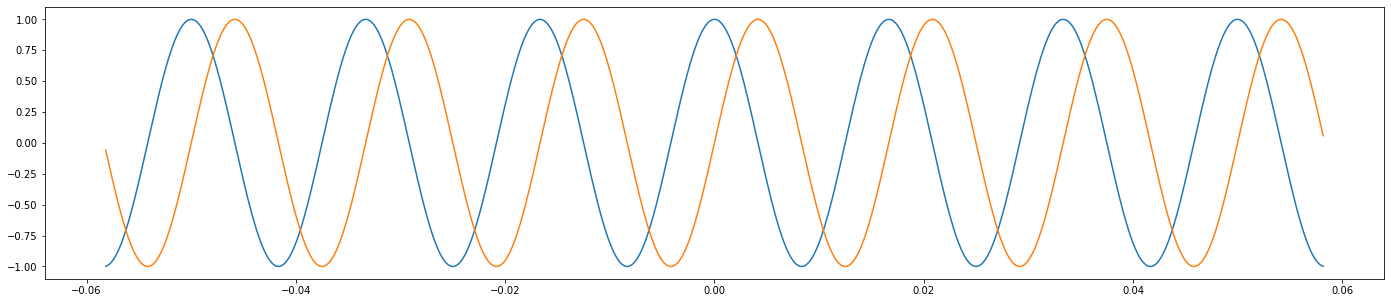

In [ ]:
x, y_cos, y_sin = generator(60, 1)

De igual forma se genera la señal portadora en azul, y su homóloga desfasada por 90 grados en anaranjado

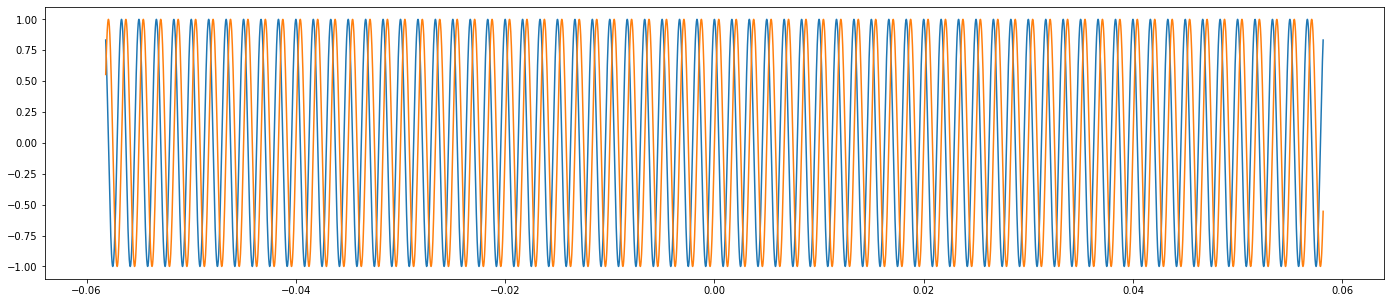

In [ ]:
x_carrier, y_cos_carrier, y_sin_carrier = generator(600, 1)

Por último se muestra la señal ya modulada, es un poco dificil observar los cambios en la frecuencia de la señal, sin embargo, si se amplia la imaagen y se compara con la señal portadora es más sencillo observar la diferencia.

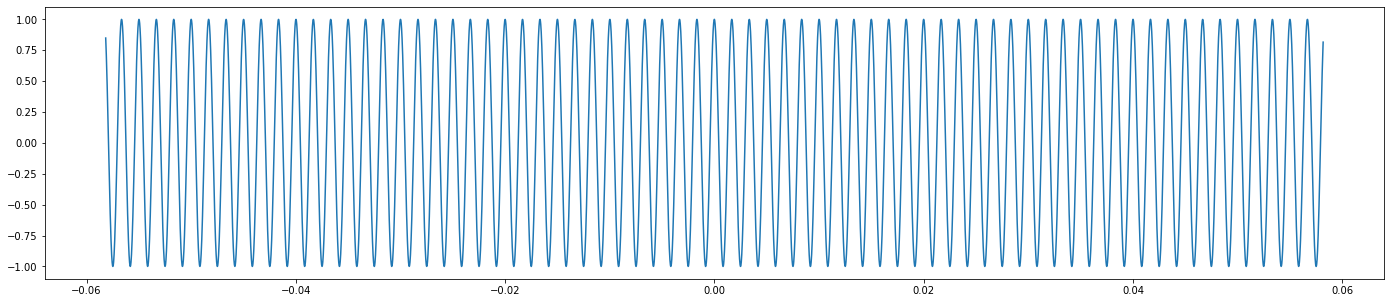

In [ ]:
s_t = NBPM(y_cos_carrier, y_sin_carrier, y_cos, 0.030)

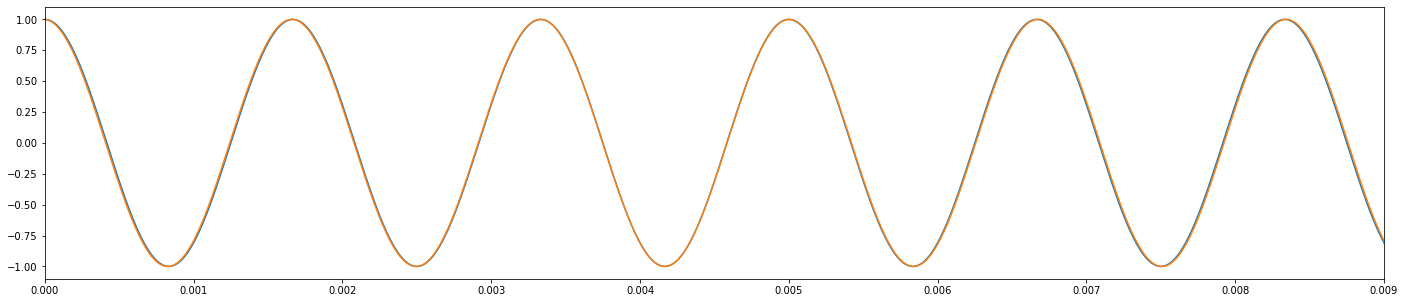

In [ ]:
plotting(y_cos_carrier, s_t)

En la gráfica anterior puede apreciarse una versión ampliada de la señal, en donde sí es visible la variación en la frecuencia de la señal s_t (anaranjada) en comparación a la señal portadora, la cual tiene una frecuencia fija de 600 Hz. Dicha variación representa la modulación de la señal moduladora en la señal portadora

Por su parte, en la frecuencia se tiene el siguiente comportamiento, el cual es congruente con la respueste en frecuencia esperado, quzá se obsrva de mejor manera en la gráfica ampliada adjunta



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


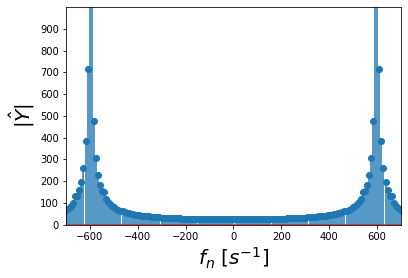

In [ ]:
fourier(s_t, -700, 700)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


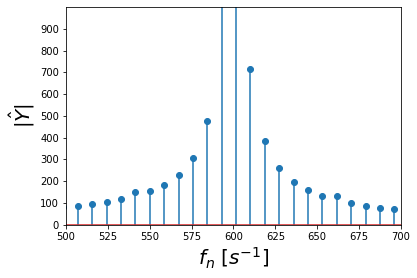

In [ ]:
fourier(s_t, 500, 700)

En este caso, se tiene un pico en la frecuencia de la señal portadora sin embargo hay 2 pequeños picos en la frecuencia $f_c \pm f_m$, lo que es un comportamiento esperado según la teoría.

###Análisis de modulación por amplitud residual

Se hará el análisis para un $\beta=0.1$, donde no tiene por qué observarse modulación de amplitud residual, esto debido a que, según la teoría esta no aparecerá si $\beta<0.3$, de la misma manera se analizará un $\beta=2$, donde el $\beta$ se hace grande y por ende se esperala modulación por ampitud residual.

####$\beta=0.05$

Utilizando las señales generadas en los puntos anteriores, se modula utilizando el $\beta$ indicado y NBFM

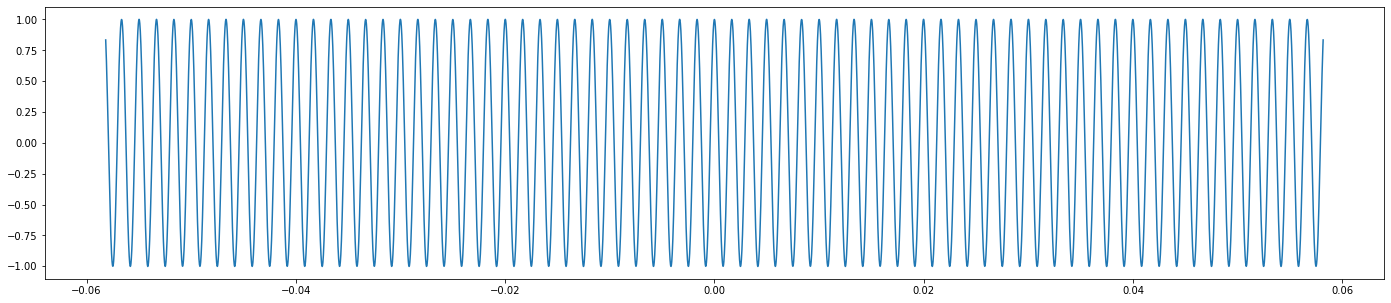

In [ ]:
s_t = NBFM(y_cos_carrier, y_sin_carrier, y_sin, 0.05)

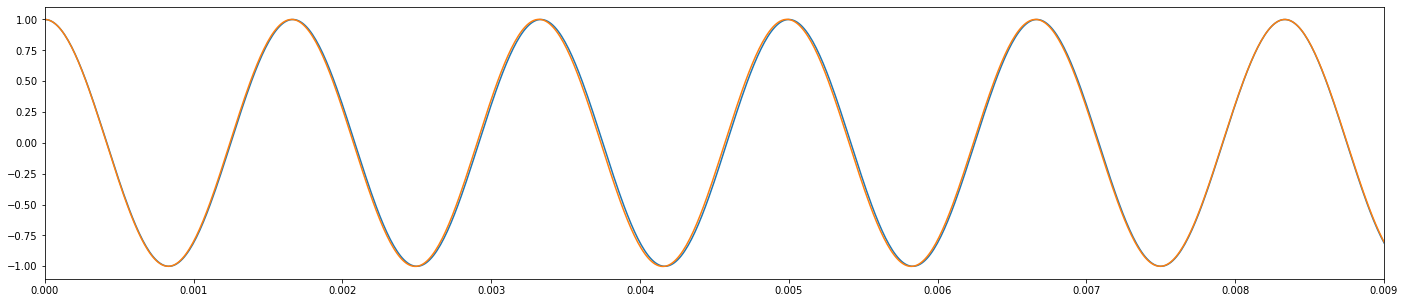

In [ ]:
plotting(y_cos_carrier, s_t)

####$\beta=2$

Utilizando las señales generadas en los puntos anteriores, se modula utilizando el $\beta$ indicado y NBFM

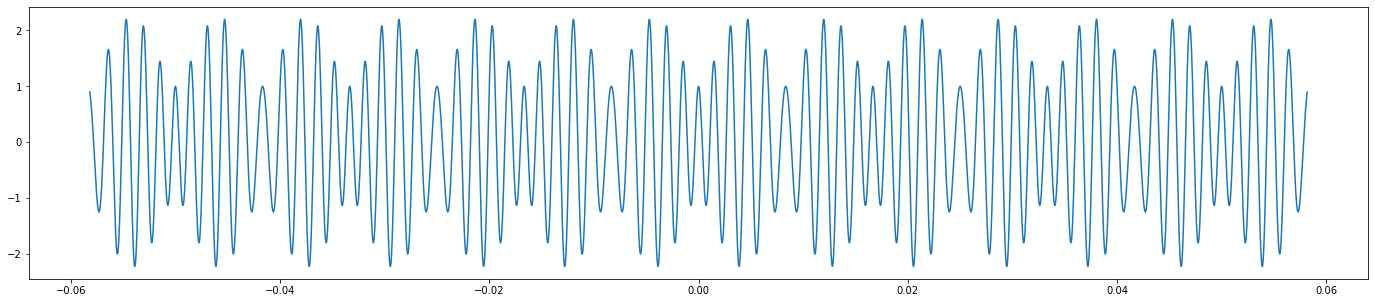

In [ ]:
s_t = NBFM(y_cos_carrier, y_sin_carrier, y_sin, 2)

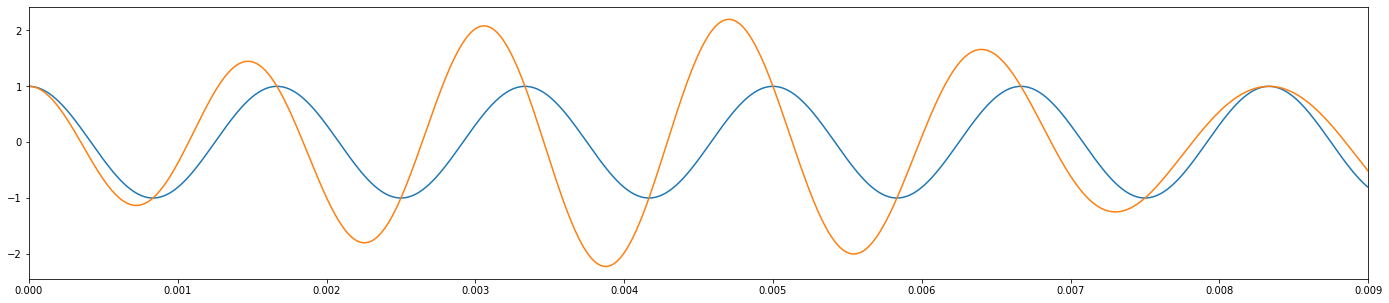

In [ ]:
plotting(y_cos_carrier, s_t)

####Análisis

Tal y como se muestra en la teoría, el valor de $\beta$ está dado por:
$$\beta=\frac{\Delta_f}{f_m}=\frac{k_fA_m}{f_m}$$
Este beta se asemeja mucho al factor $\mu$ presente en la modulación AM DSB-LC en donde, este $\mu$ a mayor tamaño tuviese, más se nota el efecto de la modulación, dicho factor está dado por:
$$\mu = k_aA_m$$
Debido a la similitud de la modulación DSB-LC con la NBFM pueden aparecer efectos como la modulación por amplitud residual, los cuales, según nos indica la teoría serán despreciables siempre que:
$$\beta=\frac{\Delta_f}{f_m}<<0.3rad$$
Si se observa la modulación en donde el $\beta=0.05$ es casi imposible distinguir lo que sucede con la amplitud, aunque se tenga modulación por amplitud residual, mientras que si se hace un aumento a la señal, si es posible distinguir, al comparase con la señal portadora (en azul en ambas gráficas con acercamiento) la variación en la frecuencia de la señal, lo cual es el mensaje a transmitir, en su lugar, si se utiliza un $\beta$ grande, como lo es un $\beta=2$ es de esperar que obtengamos una modulación por amplitud residual, ya que este valor es mucho mayor que 0.3. Esto es justamente lo que se obtiene, si se observa, no es necesaria gran meticulosidad para ver de forma clara la modulación por amplitud que se da, e incluso identificar el mensaje en la envolvente de la señal modulada. Si bien también se puede apreciar los cambios en la frecuencia, esta señal está distorsionada y por ende no es de utilidad en el caso de la modulación FM.

##Tarea 3

In [ ]:
#Funcion que calcula la transformada de fourier de una señal en el tiempo. Recibe como parámetros un n que representa el rango del dominio de la frecuencia y a la señal s
def transfourier_mod(s,n2):
  
  t = np.linspace(0,T,n2)
  dt = np.diff(t)[0]

  f_FFT = fftfreq(len(t), np.diff(t)[0])
  s_FFT = fft(s)

  f_FFT=f_FFT[:n2//2]
  s_FFT=np.abs(s_FFT[:n2//2])
  return(f_FFT,n2,s_FFT)

In [ ]:
#-------------------------------------------------------------------------EJERCICIO 1----------------------------------------------------------
#Se definen constantes necesarias para graficar las señales
fs=171888                                                                       #Frecuencia de muestreo
T=np.pi/(54*1.5)                                                                #Tiempo total en el que se graficaran las señales
n=int(T*fs)                                                                     #Numero de muestras totales
f_c=5000                                                                        #Frecuencia de la señal portadora, siempre será contante
A_m=1                                                                           #Ampñitud de la señal moduladora
k_f=2000                                                                        #Sensibilidad de fase
f_m=120     
delta_f=2000                                                                    #Frecuencia señal moduladora, se variará posteriormente
beta=delta_f/f_m
print(beta)

x=np.linspace(0,T,n,endpoint=True)                                              #Muestras de tiempo
s_mod=np.cos(2*np.pi*f_m*x)                                                     #Senal mensaje, moduladora
s_fm=np.cos(2*np.pi*f_c*x+beta*np.sin(2*np.pi*f_m*x))                           #Senal modulada por FM en banda ancha

f_fm_FFT,n2_fm,s_fm_FFT=transfourier_mod(s_fm,750)                              #Calcula transformadas de Fourier de la se;al moduladora y la modulada por FM
f_mod_FFT,n2_mod,s_mod_FFT=transfourier_mod(s_mod,70)

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
fig.set_figwidth(20)
fig.set_figheight(5)
figure, axis = plt.subplots(2, 2,figsize=(24,12))
axis[0,0].plot(x, s_mod)
axis[0,0].set_title("Señal moduladora en el tiempo")
axis[1,0].plot(x, s_fm)
axis[1,0].set_title("Señal moduladora en el tiempo")
axis[0,1].plot(f_mod_FFT,s_mod_FFT)
axis[0,1].set_title("Señal modulada en el tiempo")
axis[1,1].plot(f_fm_FFT,s_fm_FFT)
axis[1,1].set_title("Señal modulada en la frecuencia")

plt.show()

37.5
12.5
7.5
5.172413793103448


<Figure size 1440x360 with 0 Axes>

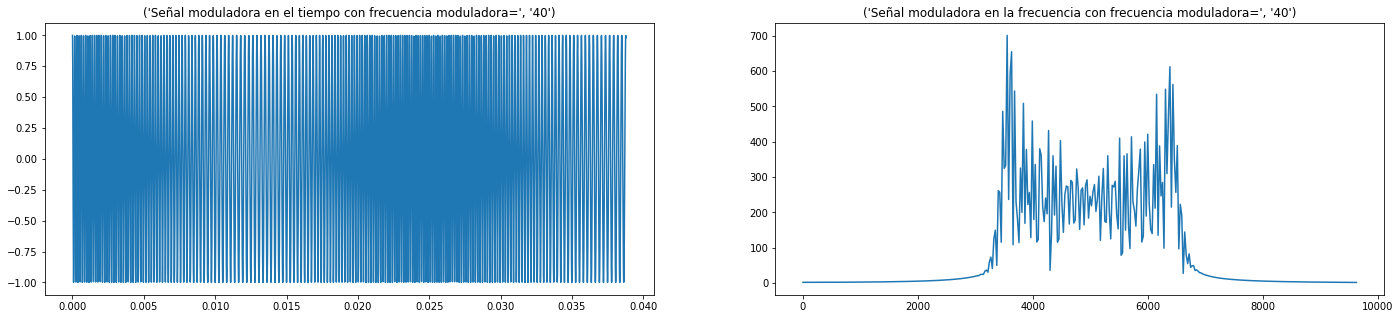

<Figure size 1440x360 with 0 Axes>

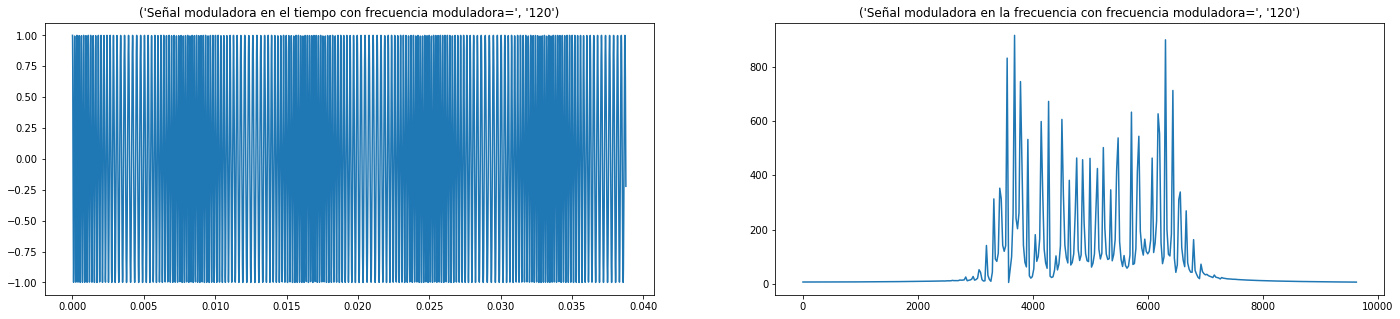

<Figure size 1440x360 with 0 Axes>

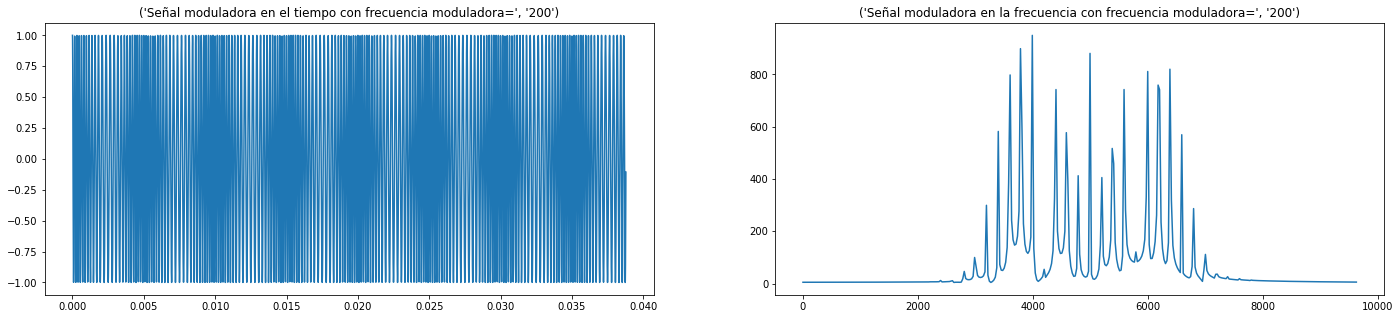

<Figure size 1440x360 with 0 Axes>

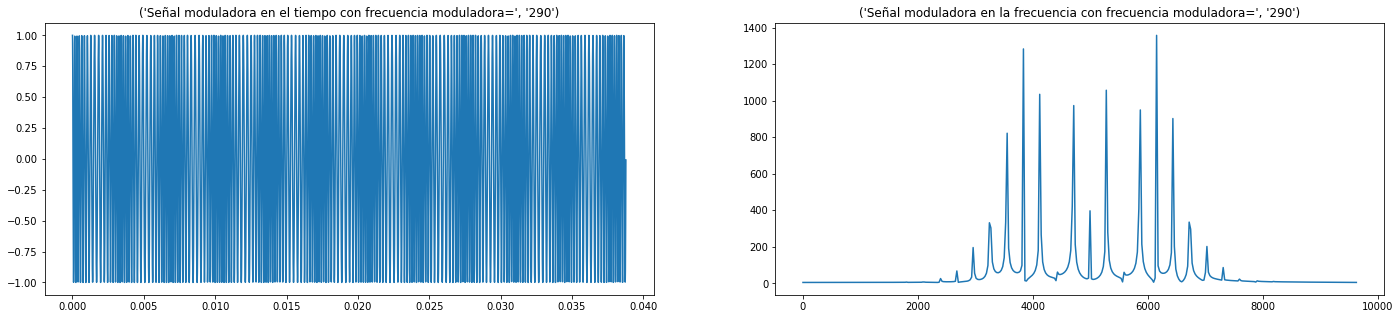

In [ ]:
#-------------------------------------------------EJERCICIO 2-------------------------------------------------------------
#Esta funcion recibe como parametros una nueva frecuencia moduladora, la cual modifica el beta de la senal modulada en fm
def frecuencia_moduladora(f_m,n):
                                                                                #Simplemente se define un nuevo valor de beta basado en el parametro frecuencia moduladora, 
  delta_f=1500                                                                  #manteniendo constante delta_f, que es la desciacion de frecuencia
  beta=delta_f/f_m
  print(beta)
                                                                                #El resto del codigo es igual al anterior, se calculan las transformadas de fourier
  s_fm=np.cos(2*np.pi*f_c*x+beta*np.sin(2*np.pi*f_m*x))                         #y se grafica la senal en el tiempo y frecuencia 
  f_fm_FFT,n2_fm,s_fm_FFT=transfourier_mod(s_fm,n)

  fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
  fig.set_figwidth(20)
  fig.set_figheight(5)
  figure, axis = plt.subplots(1, 2,figsize=(24,5))
  axis[0].plot(x, s_fm)
  title1="Señal moduladora en el tiempo con frecuencia moduladora=",str(f_m)
  axis[0].set_title(title1)
  axis[1].plot(f_fm_FFT,s_fm_FFT)
  title2="Señal moduladora en la frecuencia con frecuencia moduladora=",str(f_m)
  axis[1].set_title(title2)    

#------------------------------------------Se llama a la funcion para valores de frecuencia moduladora de 40, 120, 200 y 290Hz-------------------------------------------------
frecuencia_moduladora(40,750)
frecuencia_moduladora(120,750)
frecuencia_moduladora(200,750)
frecuencia_moduladora(290,750)

Al variar la frecuencia moduladora y mantener la desviación de la frecuencia constante se pueden observar dos efectos en el espectro de la frecuencia: 


*   El ancho de banda varía. Ante una mayor frecuencia moduladora el factor beta se ve directamente modificado, por lo cual por ejemplo para una frecuencia moduladora de aproximadamente 40Hz el ancho de banda va de los 2700 a los 4300Hz aproximadamente. Para la frecuencia moduladora máxima probada de 290Hz el ancho de banda va de 2200 a 7800 Hz aproximadamente. 
*   La distancia entre cada uno de los armónicos se ve modificada también. Las frecuencias a las cuales se presentan los armónicos corresponden a $f_c \pm n*f_m$, donde n corresponde a un número entero. Entonces, al aumentar la fm, aumenta también la distancia entre cada armónico. Se puede apreciar como en el caso de 290Hz el espaciamiemtro es mayor que en el resto de gráficas.



4.166666666666667
12.5
25.0
33.333333333333336


<Figure size 1440x360 with 0 Axes>

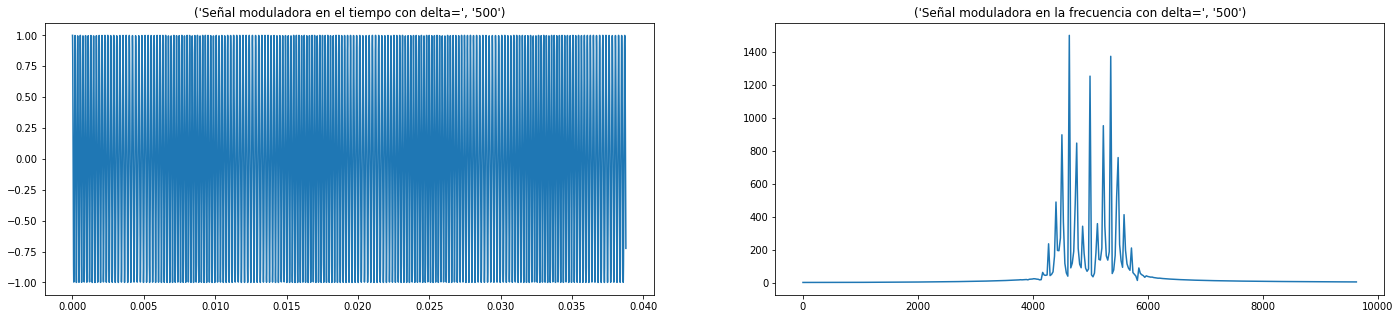

<Figure size 1440x360 with 0 Axes>

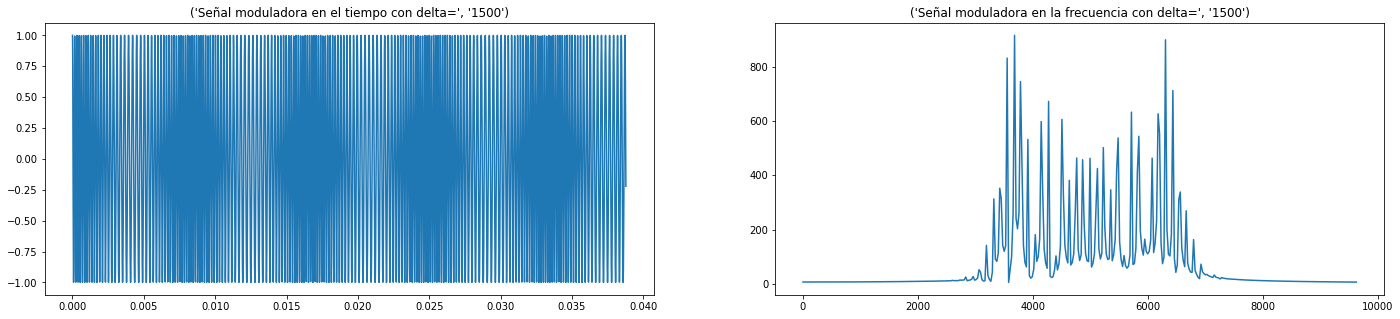

<Figure size 1440x360 with 0 Axes>

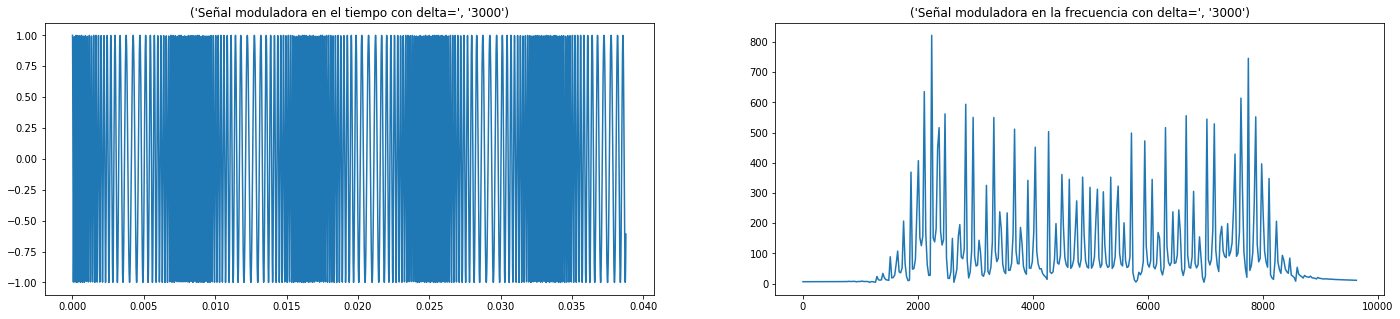

<Figure size 1440x360 with 0 Axes>

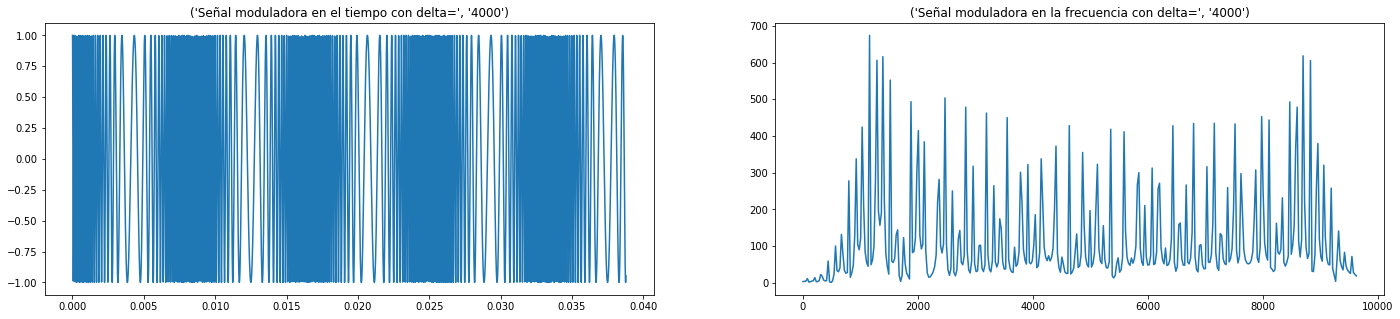

In [ ]:
#----------------------------------------------------------------------------EJERCICIO 3---------------------------------------------------------------------------
#Esta funcion es identica a la anterior con la diferencia de que se mantiene la frecuencia moduladora constante en 120Hz y se varia mas bien la desviacion de frecuencia 
def desviacion_frecuencia(delta_f,n):
  f_m=120
  beta=delta_f/f_m
  print(beta)

  s_fm=np.cos(2*np.pi*f_c*x+beta*np.sin(2*np.pi*f_m*x))
  f_fm_FFT,n2_fm,s_fm_FFT=transfourier_mod(s_fm,n)

  fig = plt.figure()                                                            #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
  fig.set_figwidth(20)
  fig.set_figheight(5)
  figure, axis = plt.subplots(1, 2,figsize=(24,5))
  axis[0].plot(x, s_fm)
  title1="Señal moduladora en el tiempo con delta=",str(delta_f)
  axis[0].set_title(title1)
  axis[1].plot(f_fm_FFT,s_fm_FFT)
  title2="Señal moduladora en la frecuencia con delta=",str(delta_f)
  axis[1].set_title(title2)    

#------------------------------------------Se llama a la funcion para valores de desiaci[on de frecuencia de 500, 1500, 3000 y 4000 Hz-------------------------------------------------
desviacion_frecuencia(500,750)
desviacion_frecuencia(1500,750)
desviacion_frecuencia(3000,750)
desviacion_frecuencia(4000,750)

Al variar la desviación de la frecuencia se obtiene un cambio en el bando de ancha de la señal modulada, ante mayor desviación de la frecuencia, mayor ancho de banda. Además

Text(0.5, 1.0, "('Señal moduladora en la frecuencia con frecuencia moduladora=', '120')")

<Figure size 1440x360 with 0 Axes>

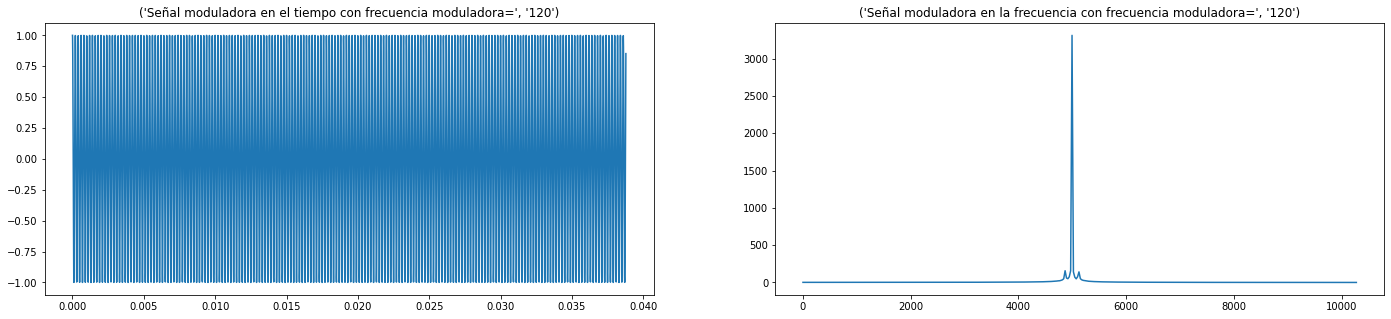

In [ ]:
#-------------------------------------------------------------EJERCICIO 4-------------------------------------------------------------------------
#Finalmente se implementa un beta pequeno, de 0.1, por lo que la modulacion FM se vuelve de banda angosta

beta=0.1
s_fm=np.cos(2*np.pi*f_c*x+beta*np.sin(2*np.pi*f_m*x))
f_fm_FFT,n2_fm,s_fm_FFT=transfourier_mod(s_fm,800)

fig = plt.figure()                                                              #Todo el código que procede en esta función es el ploteo de las señales ya obtenidas
fig.set_figwidth(20)
fig.set_figheight(5)
figure, axis = plt.subplots(1, 2,figsize=(24,5))
axis[0].plot(x, s_fm)
title1="Señal moduladora en el tiempo con frecuencia moduladora=",str(f_m)
axis[0].set_title(title1)
axis[1].plot(f_fm_FFT,s_fm_FFT)
title2="Señal moduladora en la frecuencia con frecuencia moduladora=",str(f_m)
axis[1].set_title(title2)    


En este caso se puede observar como efectivamente cuando se implementa un beta muy pequeño, menor a 0.3, el espectro se compone prácticamente solo por la frecuencia de la portadora y con una magnitud muy pequeña un par de armónicos que corresponden a $f_c \pm f_m$, solamente.

### Función de Bessel


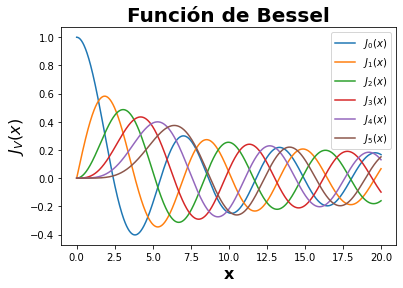

In [ ]:
def FuncionBessel(orden):
  x = np.linspace(0, 20, 1000)                                                  #Se define el eje x

  for i in range (0, orden + 1):                                                #Función de Bessel para los valores de x, cambiando el orden de la función "i" en cada ciclo
    J = jv(i,x)
    plt.plot(x, J, label = r'$J_'+str(i)+'(x)$')                                #Se plotean las funciones

  plt.legend()                                                                  #Se definen las características de la gráfica
  plt.title("Función de Bessel", fontweight = "bold", fontsize =20)
  plt.xlabel("x",fontweight = "bold", fontsize =16)
  plt.ylabel(("$J_V(x)$"), fontweight = "bold", fontsize = 16)
  plt.show()

FuncionBessel(5)                                                                #Se llama a la función indicando la cantidad de ordenes de la función de Bessel que se desea